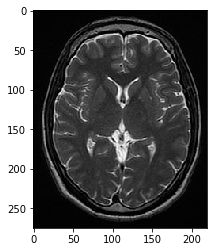

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread('images/brainMR.jpg')

image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

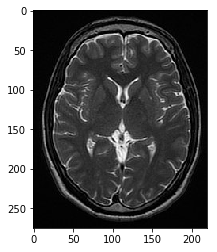

In [9]:
#convert to gray scale
gray_img = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)

plt.imshow(gray_img, cmap='gray')

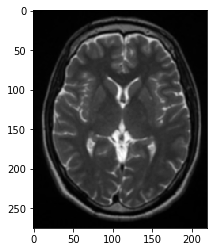

In [10]:
#create a gaussian blurred image using (Low Pass Filter)
#GaussianBlur function which takes gray scale image, size of kernel, stand deviation
#stand deviation = 0 means it will automatically calculate
gray_blur_img = cv2.GaussianBlur(gray_img,(5,5),0)
plt.imshow(gray_blur_img, cmap='gray')

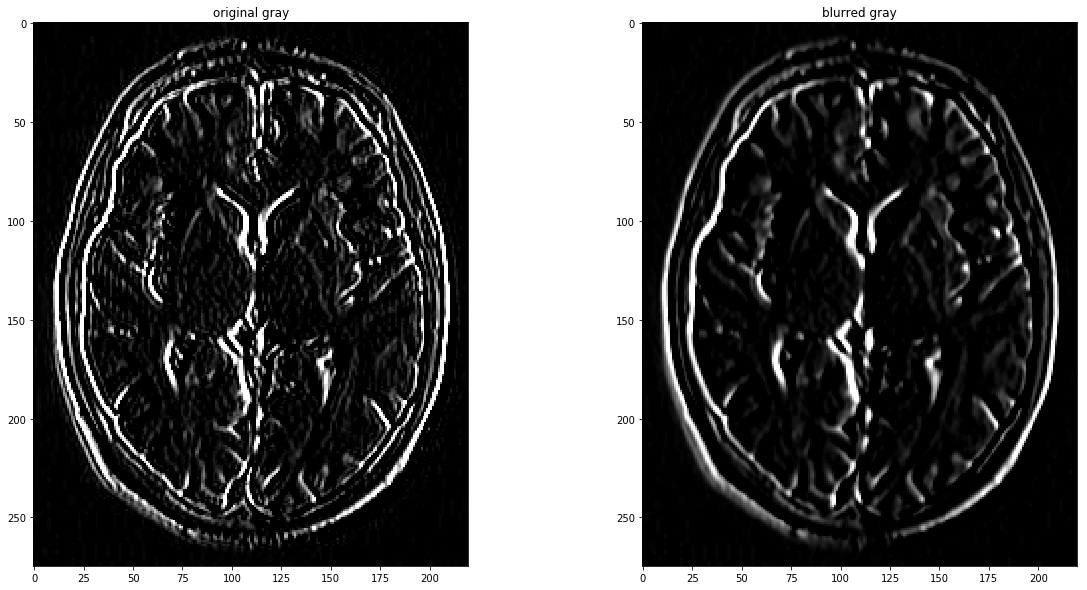

In [11]:
#High pass filter
#3*3 array kernel(filter) for vertical edge detection
#Sobel filter
sobel_x = np.array([[-2,0,2],
                  [-1,0,1],
                  [-2,0,2]])

#blurred gray scale image passed through high pass filter
#convolution using filter2D function with inputs as grayScaleImg, bit-depth,kernal
conv_blur_img = cv2.filter2D(gray_blur_img,-1,sobel_x)

#original gray scale image passed through high pass filter
conv_img = cv2.filter2D(gray_img,-1,sobel_x)

f, (plt1,plt2) = plt.subplots(1,2,figsize=(20,10))

plt1.set_title('original gray')
plt1.imshow(conv_img, cmap='gray')

plt2.set_title('blurred gray')
plt2.imshow(conv_blur_img, cmap='gray')


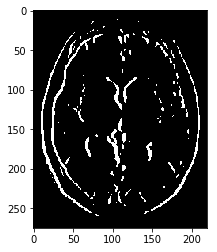

In [18]:
#convert filtered image into binary image
retval,binary_img = cv2.threshold(conv_blur_img,100,255,cv2.THRESH_BINARY)  #threshold to see stronger edges clearly
plt.imshow(binary_img,cmap='gray')